# Project 3
## Author: Tianrui Guan
## Teammates: Xuejing Wang Kaiyin Li

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

sns.set(style="darkgrid")
data = pd.read_csv("gap.tsv", sep='\t')
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


### Exercise 1
Make a scatter plot of life expectancy across time.

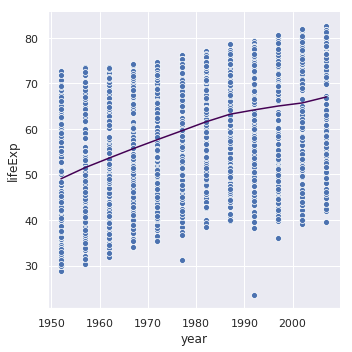

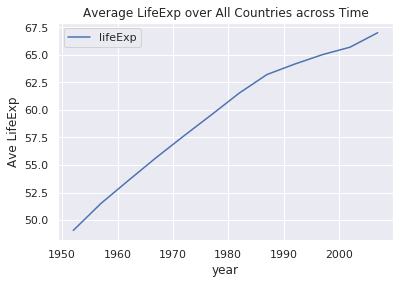

R-squared is: 0.972507657646


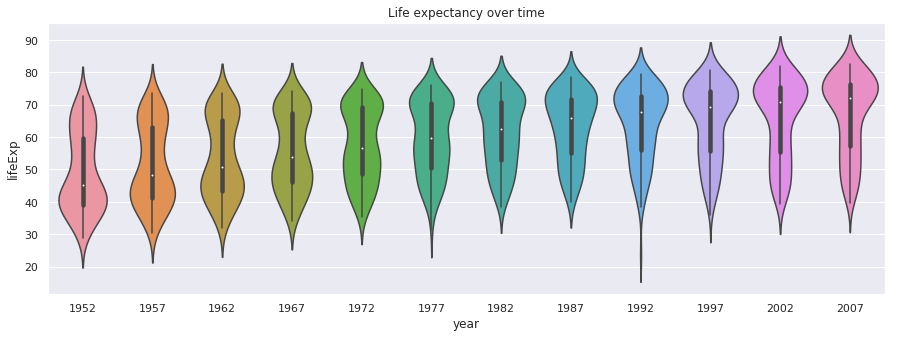

In [22]:
# scatter plot
plot1 = sns.relplot(x = "year", y = "lifeExp", data = data)
plot2 = data.groupby(["year"])["lifeExp"].mean().plot(kind = 'line', colormap = 'viridis')

# data.plot.scatter(x='year', y='lifeExp', title="Life Expectancy across Time",s=5, c='black')

# xs = np.linspace(data.year.min(), data.year.max())
line = np.polyfit(data.year, data.lifeExp, 1)
# plt.plot(xs, np.poly1d(line)(xs), 'b-', linewidth=2, label='y={:.3f}+{:.3f}x'.format(line[1], line[0]))
# plt.legend()

q1 = data[['country', 'year', 'lifeExp']].groupby(['year']).mean();

q1.plot(title='Average LifeExp over All Countries across Time')
plt.ylabel("Ave LifeExp")
plt.legend()
plt.show()

_, _, r_value, _, _ = stats.linregress(q1.index, q1.lifeExp)
print("R-squared is:",r_value**2)

plot3 = sns.violinplot(x = 'year', y = 'lifeExp', data = data).set_title("Life expectancy over time")
plot3.figure.set_size_inches(15, 5);


**Question 1**: *Is there a general trend (e.g., increasing or decreasing) for life expectancy across time? Is this trend linear? (answering this qualitatively from the plot, you will do a statistical analysis of this question shortly)*

Yes, the general trend is increasing across time. 
In the Average LifeExp over All Countries across Time, 
R-squared = 0.97250765764552138, it is linear.

**Question 2**: *How would you describe the distribution of life expectancy across countries for individual years? Is it skewed, or not? Unimodal or not? Symmetric around it’s center?*

Based on the visual, the distributions of each individual year are mostly skewed, except for few years like 1967 and 1972, which are less skewed. Most of the distributions are not unimodal. It has the tendency that the distribution goes from less bimodal to more bimodal, then to unimodal across years. Most of them are not symmetric except 1967(a bit more symmetric).

**Question 3**: *Suppose I fit a linear regression model of life expectancy vs. year (treating it as a continuous variable), and test for a relationship between year and life expectancy, will you reject the null hypothesis of no relationship? (do this without fitting the model yet. I am testing your intuition.)*

Yes, because I think there might be a linear relationship between life expectancy and year.

**Question 4**: *What would a violin plot of residuals from the linear model in Question 3 vs. year look like? (Again, don’t do the analysis yet, answer this intuitively)*

They should have similar shape as the one plotted in Exercise 1. But all of them will centered around y = 0;

**Question 5**: *According to the assumptions of the linear regression model, what should that violin plot look like?*

In general, each "violin" should generally looked increasing, or decreasing. (Every one is higher than its next one, or every one is lower than its next one, around the same amount.) The peak of each violin should also look genrally on one line. (The peak should not jump too much around that line.)

### Exercise 2
Fit a linear regression model using, e.g., the LinearRegression function from Scikit-Learn or the closed-form solution we derived in class, for life expectancy vs. year (as a continuous variable).

In [3]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data.year, data.lifeExp)
print("slope:", slope)
print("intercept:", intercept)
print("r-value:", r_value)
print("p_value:", p_value)
print("std_err:", std_err)

# alternative way using stats library
model1 = ols(formula='lifeExp ~ year', data=data).fit()  
print(model1.summary())

slope: 0.325903827637
intercept: -585.652187442
r-value: 0.435611224054
p_value: 7.5467946256e-80
std_err: 0.0163236858676
                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Sun, 09 Dec 2018   Prob (F-statistic):           7.55e-80
Time:                        02:53:02   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------

**Question 6**: *On average, by how much does life expectancy increase every year around the world?*

On average, life expectancy increase around 0.3259 every year.

**Question 7**: *Do you reject the null hypothesis of no relationship between year and life expectancy? Why?*

Lineregress function from scikit-learn gives the p value of the hypothesis test about slope: H0: slope = 0 (no linear relationship) v.s H1: otherwise (linear relationship)

Given the small p-value, we can know that we can reject that there is no linear relationship between life expectancy and year. But from the small r-value, we can also say that the fit is terrible, because of the large variations.

We can not reject the null hypothesis of no relationship between year and life expectancy, because we did not conduct a hypothesis test about this null hypothesis. (From another perspective, we can not reject H0 because of the small r-value, and we need to find other test of see if the data fits other model).

### Exercise 3

Make a violin plot of residuals vs. year for the linear model from Exercise 2.

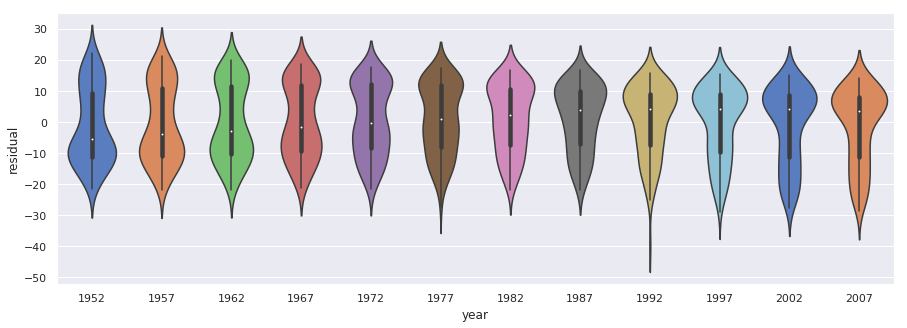

In [4]:

data["residual"] = data.lifeExp - np.poly1d(line)(data.year)
ax = sns.violinplot(x="year", y="residual", data=data, palette="muted")

ax.figure.set_size_inches(15, 5);


**Question 8**: *Does the plot of Exercise 3 match your expectations (as you answered Question 4)?*

It matched my expetation answered in Question 4.

### Exercise 4
Make a boxplot (or violin plot) of model residuals vs. continent.

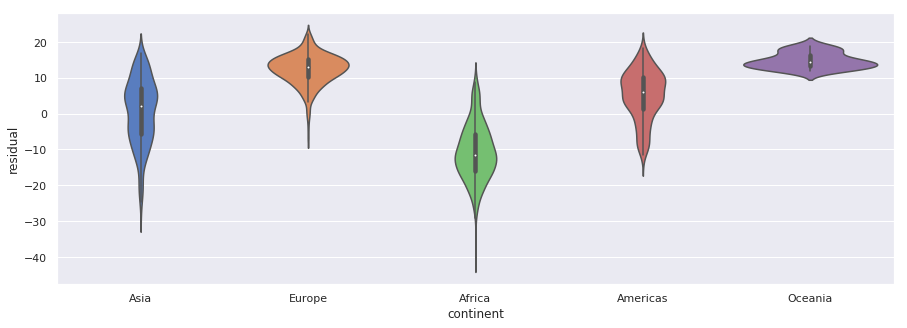

In [5]:
ax = sns.violinplot(x="continent", y="residual", data=data, palette="muted")

# plot5 = sns.boxplot(x = "continent", y = "residual_1", data = data).set_title("residual vs. continent")

ax.figure.set_size_inches(15, 5);


**Question 9**: *Is there a dependence between model residual and continent? If so, what would that suggest when performing a regression analysis of life expectancy across time?*

Yes, there is a dependency. In continent like Europe, Americans and Oceania, the regression line seemed underestimate the life expectancy, while for continent like Africa, the regression line seemed overestimate it. 

From this conclusion, we can decide that maybe we should group by continent.

### Exercise 5
As in the Moneyball project, make a scatter plot of life expectancy vs. year, grouped by continent, and add a regression line.

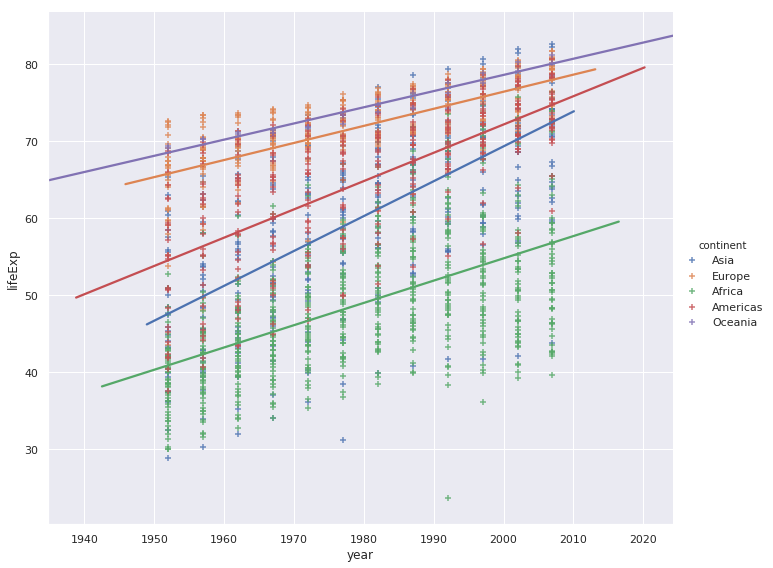

In [6]:

plot6 = sns.lmplot(x="year", y="lifeExp", hue="continent", data=data, height=8, aspect=1.2, ci = None, markers = "+")

# continents = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
# fig = plt.figure()
# fig.set_figheight(10)
# fig.set_figwidth(10)

# for continent in continents:
#     temp = data[data.continent == continent]
#     plt.scatter(x=temp.year, y=temp.lifeExp, label=continent, s=13)
#     line = np.polyfit(temp.year, temp.lifeExp, 1)
#     plt.plot(xs, np.poly1d(line)(xs), linewidth=2, label=continent)
    
# plt.legend()


# seperate plot
# for continent in continents:
#     temp = data[data.continent == continent]
#     temp.plot.scatter(x='year', y='lifeExp', title=continent, s=5)
#     line = np.polyfit(temp.year, temp.lifeExp, 1)
#     plt.plot(xs, np.poly1d(line)(xs), linewidth=2)


**Question 10**: *Based on this plot, should your regression model include an interaction term for continent and year? Why?*

* Yes. Looking at the regression line, they are about to intersect, so we should include a interaction term.

### Exercise 6
Fit a linear regression model for life expectancy including a term for an interaction between continent and year.

In [7]:
rank = pd.DataFrame({"continent": ["Asia", "Europe", "Africa", "Americas", "Oceania"], "cont_rank": [2, 4, 1, 3, 5]})
data = data.merge(rank, left_on = "continent", right_on = "continent", how = "inner")

In [8]:
X2 = data[["year", "cont_rank"]]
y2 = data.lifeExp

interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_inter = interaction.fit_transform(X2)
regr = LinearRegression()
model = regr.fit(X_inter, y2)
b0 = model.intercept_
b1 = model.coef_[0]
b2 = model.coef_[1]
b3 = model.coef_[2]
print("The regression model with interaction between continent and year is:\n ", "y=", b0, "+", b1, "*year+", b2, "*continent", b3, "*year*continent")

The regression model with interaction between continent and year is:
  y= -690.628897222 + 0.370407597963 *year+ 46.150751668 *continent -0.019565125035 *year*continent


In [9]:
# alternative way: use Statsmodels
model2 = ols(formula='lifeExp ~ year + cont_rank + year * cont_rank', data=data).fit()  
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     1130.
Date:                Sun, 09 Dec 2018   Prob (F-statistic):               0.00
Time:                        02:53:05   Log-Likelihood:                -5843.0
No. Observations:                1704   AIC:                         1.169e+04
Df Residuals:                    1700   BIC:                         1.172e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -690.6289     44.510    -15.

**Question 11**: *Are all parameters in the model significantly different from zero? If not, which are not significantly different from zero?*

No. If we decide to set out significant level to be 0.01, then the interception, the coeficient of year and the coeficient of continent are not significantly different from zero, while the coeficient for the interaction between year and continent are significantly different from zero. 

**Question 12**: *On average, by how much does life expectancy increase each year for each continent? (Provide code to answer this question by extracting relevant estimates from model fit)*

The model we get above is:<br />
$lifeExp = 32.4067 + 0.3704\times year + 7.9567\times continent - 0.0196\times year\times continent$ <br />
Which can be derived as: <br />
$lifeExp = 32.4067 + (0.3704 - 0.0196\times continent)\times year + 7.9567\times continent$





In [10]:
# continent 1 is Africa
i_Africa = b1 + b3
# continent 2 is Asia
i_Asia = b1 + 2*b3
# continent 3 is Americas
i_Americas = b1 + 3*b3
# continent 4 is Europe
i_Europe = b1 + 4*b3
# continent 5 is Ocienia
i_Oceania = b1 + 5*b3
increase_data = pd.DataFrame({"continent": ["Asia", "Europe", "Africa", "Americas", "Oceania"], "increase_each_year": [i_Asia, i_Europe, i_Africa, i_Americas, i_Oceania]})
increase_data

,continent,increase_each_year
0,Asia,0.331277
1,Europe,0.292147
2,Africa,0.350842
3,Americas,0.311712
4,Oceania,0.272582


In [11]:
anova1 = anova_lm(model1)
print("F-test for model1: \n", anova1, "\n")
anova2 = anova_lm(model2)
print("F-test for model2: \n", anova2, "\n")
anova_compare = anova_lm(model1, model2)
print("F-test for comparing model1 and model2: \n", anova_compare)

F-test for model1: 
               df         sum_sq       mean_sq           F        PR(>F)
year         1.0   53919.184217  53919.184217  398.604746  7.546795e-80
Residual  1702.0  230229.199536    135.269800         NaN           NaN 

F-test for model2: 
                     df         sum_sq        mean_sq            F  \
year               1.0   53919.184217   53919.184217   965.651504   
cont_rank          1.0  135026.554486  135026.554486  2418.222702   
year:cont_rank     1.0     279.566877     279.566877     5.006830   
Residual        1700.0   94923.078173      55.837105          NaN   

                       PR(>F)  
year            2.853731e-168  
cont_rank        0.000000e+00  
year:cont_rank   2.537661e-02  
Residual                  NaN   

F-test for comparing model1 and model2: 
    df_resid            ssr  df_diff        ss_diff            F  Pr(>F)
0    1702.0  230229.199536      0.0            NaN          NaN     NaN
1    1700.0   94923.078173      2.0  135306.12

/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


**Question 13**: *Is the interaction model significantly better than the year-only model? Why?*

* From the respective F-test result, we can see that the residual sum of square of model2 is significantly smaller than that of model1, whcih means that model2 fits better than model1. 
* From the F-test performed on both models, we see that the p-value is nearly zero, which means that we should reject the null hypothesis that says the omitted coeeficients are all 0. 

### Exercise 8
Make a residuals vs. year violin plot for the interaction model. Comment on how well it matches assumptions of the linear regression model. Do the same for a residuals vs. fitted values model.

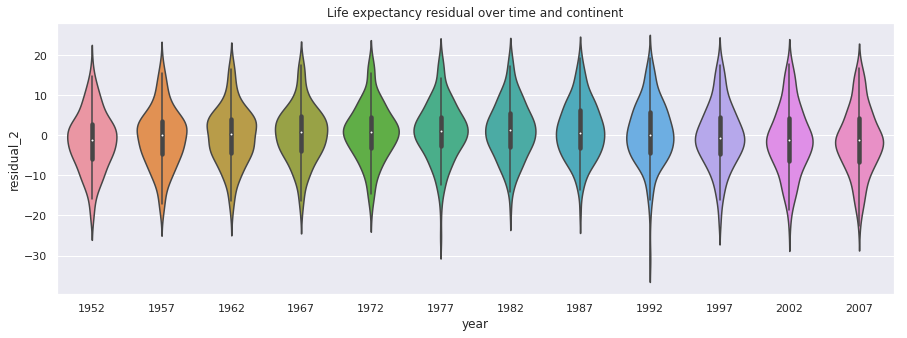

In [12]:
data["residual_2"] = data["lifeExp"] - (b0 + b1*data["year"] + b2*data["cont_rank"] + b3*data["year"]*data["cont_rank"])

plot4 = sns.violinplot(x = 'year', y = 'residual_2', data = data).set_title("Life expectancy residual over time and continent")
plot4.figure.set_size_inches(15, 5);


The residual plot with model2 behaves better than the previous one. We can see that the spread of each "violin" is smaller. The median of each "violin" is also more centered around y = 0.

# Part 2: Classification

## Gradient Descent
### Problem 1
Implement the gradient descent algorithm (either batch or stochastic versions) for multiple linear regression. I.e., extend the version of the algorithm in the lecture notes to multiple parameters.

In [13]:
# I believe that the algorithm in the lecture notes also works for multiple linear regression.
# It's just a matter of input we use. For multiple linear regression, the input X would be a matrix
# with more than 2 columns. The parameter vector theta would be more than 2 dimensions.
# Training data (X, y), T time steps, alpha step
# This is the batch version
def grad_descent_linear_regression_batch(X, y, T, alpha, add_intercept = False):
    # option of adding an intercept term
    if add_intercept: 
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
    
    # m = # of examples, n = # of features
    m, n = X.shape 
    # initialize parameters
    theta = np.zeros(n) 
    # track loss over time
    f = np.zeros(T) 
    
    for i in range(T):
        # loss for current parameter vector theta
        f[i] = 0.5*np.linalg.norm(X.dot(theta) - y)**2
        # compute steepest ascent at f(theta)
        g = X.T.dot(X.dot(theta) - y)
        # step down the gradient
        theta = theta - alpha*g
    return theta, f

# This is the stochastic version
def grad_descent_linear_regression_stochastic(X, y, T, alpha, add_intercept = False):
    # option of adding an intercept term
    if add_intercept: 
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
    
    # m = # of examples, n = # of features
    m, n = X.shape 
    # initialize parameters
    theta = np.zeros(n) 
    # track loss over time
    f = np.zeros(T) 
    
    for i in range(T):
        # initialize sum of errors
        sum_err = 0 
        # use the data point one by one (row by row)
        for j in range(X.shape[0]): 
            # this is predicted value based on theta
            y_predict = X[j].dot(theta) 
            # calculate error in this iteration
            error = y_predict - y[j]
            # culmulate error/loss
            sum_err += error**2 
            # step down the gradient
            theta = theta - alpha * X[j].T.dot(error) 
        # store the culmulative loss after iterate through all of the data points
        f[i] = sum_err
    
    return theta, f

### Problem 2 
Derive the above update equation. Write the derivation in a markdown ipynb cell.

For logistic regression, the hypothesis function we use is the logistic function/ sigmoid function:

\begin{align}
g(z) &= \frac{1}{1+e^{-z}}\\
\\
g'(z) &= \frac{d}{dz} \frac{1}{1+e^{-z}} \\
&= -\frac{-e^{-z}}{(1+e^{-z})^2} \\
&= \frac{1}{1+e^{-z}}\times \frac{e^{-z}}{1+e^{-z}} \\
&= \frac{1}{1+e^{-z}}\times(1-\frac{1}{1+e^{-z}}) \\
&= g(z)\times(1-g(z))
\end{align}

The hypothesis function we use in our case is:
\begin{align}
h_{\theta}(x) &= g(\theta^Tx) \\
&= \frac{1}{1+e^{-\theta^Tx}} \\
&= \frac{e^{\theta^Tx}}{1+e^{\theta^Tx}}
\end{align}

Assume:
\begin{align}
p(y = 1 | x;\theta) &= h_\theta(x) \\
p(y = 0 | x;\theta) &= 1-h_\theta(x)
\end{align}

It can be written as:
\begin{align}
p(y | x;\theta) &= (h_\theta(x))^y(1-h_\theta(x))^{1-y}
\end{align}


Given some $\theta$, the likelihood of our m observations as a function of $\theta$ is
\begin{align}
L(\theta) &= p(\overrightarrow{y}|X; \theta) \\
&= \prod_{i = 1}^{m}p(y_i|x_i; \theta) \\
&= \prod_{i = 1}^{m}(h_\theta(x_i))^{y_i}(1-h_\theta(x_i))^{1-y_i}
\end{align}

Note that the cost function:
\begin{align}
Cost(h_{\theta}(x), y)=\begin{cases}
               -log(h_\theta(x)) & if &y = 1\\
               -log(1 - h_\theta(x)) & if &y = 0
            \end{cases}
\end{align}



Instead of minimizing the cost(loss) function, we choose to maximize the log likelyhood function, which will be easier.

Convert it to log likelihood, and we get
\begin{align}
l(\theta) &= log L(\theta) = \sum_{i=1}^{m}y_{i}log(h_\theta(x_i))+(1-y_i)log(1-h_\theta(x_i))
\end{align}

Now we use gradient ascent to find the maximum of the log likelihood function,


First take partial derivative of the log likelihood:
\begin{align}
\frac{\partial}{\partial \theta_{j}} l(\theta)&=\frac{\partial}{\partial \theta_{j}}\sum_{i=1}^{m} y_ilog(g(\theta^Tx_i))+(1-y_i)log(1-g(\theta^Tx_i))\\
&= \sum_{i=1}^{m} \frac{y_i}{g(\theta^Tx_i)}\frac{\partial}{\partial \theta_j}g(\theta^Tx_i) + \frac{1-y_i}{1-g(\theta^Tx_i)}\frac{\partial}{\partial \theta_j}(1-g(\theta^Tx_i))\\
&= \sum_{i=1}^{m} (\frac{y_i}{g(\theta^Tx_i)}-\frac{1-y_i}{1-g(\theta^Tx_i)})\frac{\partial}{\partial{\theta_j}}g(\theta^Tx_i)\\
&= \sum_{i=1}^{m} (\frac{y_i}{g(\theta^Tx_i)}-\frac{1-y_i}{1-g(\theta^Tx_i)})(g(\theta^Tx_i)(1-g(\theta^Tx_i)))\frac{\partial}{\partial{\theta_j}}(\theta^Tx_i)\\
&= \sum_{i=1}^{m} (y_i(1-g(\theta^Tx_i))-(1-y_i)g(\theta^Tx_i))x_{ij}\\
&= \sum_{i=1}^{m} (y_i-g(\theta^Tx_i))x_{ij}\\
&= \sum_{i=1}^{m} (y_i-h_\theta(x_i))x_{ij}\\
\end{align}

So the greatest ascent direction for feature j is $\sum_{i=1}^{m} (y_i-h_\theta(x_i))x_{ij}$.

Thus gradient ascent update equation for logistic regression is:
\begin{align}
\theta^{k+1} = \theta^{k} + \alpha \sum_{i=1}^{m} (y_i-h_\theta(x_i))\overrightarrow{x}_i\\
\end{align}



### Problem 3 
Implement the gradient descent algorithm (either batch or stochastic versions) for multiple logistic regression. I.e., modify your code in problem 1 for the logistic regression update equation.

In [14]:
# This is the batch version
def grad_ascent_logistic_regression_batch(X, y, T, alpha, add_intercept = False):
    # option of adding an intercept term
    if add_intercept: 
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
    
    # initialize theta
    theta = np.zeros(X.shape[1]) 
    
    # trying to maximize likelihood 
    for i in range(T):
        # this is predicted value based on theta and logistic reg
        prediction = 1 / (1 + np.exp(-1 * np.dot(X, theta))) 
        # calculate gradient
        g = X.T.dot(y - prediction) 
        # step up the gradient
        theta = theta + alpha*g
    return theta

# This is the stochastic version
def grad_ascent_logistic_regression_stochastic(X, y, T, alpha, add_intercept = False):
    # option of adding an intercept term
    if add_intercept: 
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
        
    theta = np.zeros(X.shape[1]) # initialize theta
    
    # trying to maximize likelihood 
    for i in range(T):
        # iterate each data point
        for j in range(X.shape[0]):
            # this is predicted value based on theta and logistic reg
            prediction = 1 / (1 + np.exp(-1 * np.dot(X[j], theta))) 
            # calculate gradient
            g = X[j].T.dot(y[j] - prediction)
            # step up the gradient
            theta = theta + alpha*g
    
    return theta

### Problem 4 
To test your programs, simulate data from the linear regression and logistic regression models and check that your implementations recover the simulation parameters properly.

In [15]:
#simulate data for linear regression
gen_data_x, gen_data_y, linear_simulation_params = datasets.make_regression(n_samples=100, n_features=20, noise = 1.5, coef = True)

#simulate data for logistic regression.  This is similar to linear, only now values are either 0 or 1.  
log_gen_data_x, dump_y, logistic_simulation_params = datasets.make_regression(n_samples=100, n_features=20, noise = 1.5, coef = True)
log_gen_data_y = [0 if i>0 else 1 for i in dump_y]

Text(0,0.5,'estimated parameters')

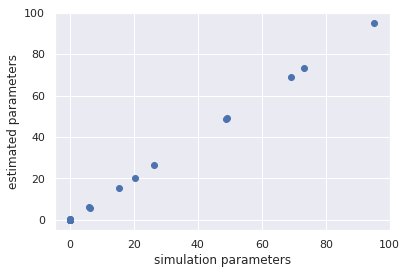

In [16]:
# gradient descent linear fit
[theta, f] = grad_descent_linear_regression_batch(gen_data_x, gen_data_y, 101, 0.001)
#[theta, f] = grad_descent_linear_regression_stochastic(gen_data_x, gen_data_y, 101, 0.001)
plt.scatter(linear_simulation_params, theta)
plt.xlabel('simulation parameters')
plt.ylabel('estimated parameters')
# From the fact that all the scatter points lie on the diagnal, we can tell that 
# my gradient descent function approximates the paramaters well enough.

In [17]:
# gradient ascent logistic fit
# theta = grad_ascent_logistic_regression_stochastic(log_gen_data_x, log_gen_data_y, 10001, 0.01, add_intercept = False)
theta = grad_ascent_logistic_regression_batch(log_gen_data_x, log_gen_data_y, 10001, 0.01, add_intercept = False)
# In this case, we are unable to get the simulation parameter since we converted the output to [0,1]. However,
# we can get a rough idea of how good our model is by observing the log likelihood of the dataset with the theta we get.
# If it is close enough to 0, we can conclude that the fit is ok.

def log_likelihood(X, y, theta):
    scores = np.dot(X, theta)
    ll = np.sum( y*scores - np.log(1 + np.exp(scores)) )
    return ll

ll = log_likelihood(log_gen_data_x, log_gen_data_y, theta)
ll
# We can see that the log likelihood is very close to 0, which means the likelihood of the dataset with the
# parameters we predicted is very close to 1. 

-0.25188814642271407

Text(0,0.5,'estimated values')

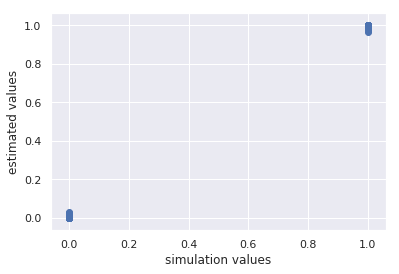

In [18]:
# Another way is similar to what we did for the linear model
predict_batch = 1 / (1 + np.exp(-1 * np.dot(log_gen_data_x, theta)))

plt.scatter(log_gen_data_y, predict_batch)
plt.xlabel('simulation values')
plt.ylabel('estimated values')
# From the fact that all the scatter points lie on the point (0, 0) and (1, 1), we can tell that 
# my gradient descent function approximates the paramaters well enough.

### Try it out!
Find a dataset on which to try out different classification (or regression) algorithms.

Choose two of the following algorithms:

* Linear Discriminant Analysis (LDA) (only classification)
* classification (or regression) trees,
* random forests
* linear SVM,
* non-linear SVM
* k-NN classification (or regression)

and compare their prediction performance on your chosen dataset to your logistic regression gradient descent implementation using 10-fold cross-validation and a paired t-test (one for each of the two algorithms vs. your logistic regression code). Note: for those algorithms that have hyper-parameters, i.e., all of the above except for LDA, you need to specify in your writeup which model selection procedure you used.

#### Dataset description
1. Title: Breast cancer data (Michalski has used this)

2. Sources: 
   * Matjaz Zwitter & Milan Soklic (physicians)
      * Institute of Oncology 
      * University Medical Center
      * Ljubljana, Yugoslavia
   * Donors: Ming Tan and Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
   *  Date: 11 July 1988
3. Relevant information
    * This data set includes 201 instances of one class and 85 instances of another class.  The instances are described by 9 attributes, some of which are linear and some are nominal.
4. Attribute Information:
   1. Class: no-recurrence-events, recurrence-events
   2. age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
   3. menopause: lt40, ge40, premeno.
   4. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44,
                  45-49, 50-54, 55-59.
   5. inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26,
                 27-29, 30-32, 33-35, 36-39.
   6. node-caps: yes, no.
   7. deg-malig: 1, 2, 3.
   8. breast: left, right.
   9. breast-quad: left-up, left-low, right-up,	right-low, central.
   10. irradiat: yes, no.
5. Class Distribution
    1. no-recurrence-events: 201 instances
    2. recurrence-events: 85 instances
6. We will predict whether the breast cancer is recurrenct or not with 9 predictors: age, menopause, tumor-size, inv-nodes, node-caps, deg-malig, breast, breast-quad and irradiat.

In [19]:
# data import and preparation
cancer_data = pd.read_csv('breast-cancer.data.ipynb', sep=",", header=None)
cancer_data.columns = ["class", "age", "menopause", "tumor-size", "inv-nodes", "node-caps", "deg-malig", "breast", "breast-quad", "irradiat"]
# deal with missing data: since the amount of missing data is not significant, we just drop them
cancer_data.replace({'?': np.nan}, inplace = True)
cancer_data.dropna(axis = 0, inplace = True)
# convert categorical data to numerical data
lb_make = LabelEncoder()
cancer_data['age_code'] = lb_make.fit_transform(cancer_data['age'])
cancer_data['menopause_code'] = lb_make.fit_transform(cancer_data['menopause'])
cancer_data['tumor-size_code'] = lb_make.fit_transform(cancer_data['tumor-size'])
cancer_data['inv-nodes_code'] = lb_make.fit_transform(cancer_data['inv-nodes'])
cancer_data['node-caps_code'] = lb_make.fit_transform(cancer_data['node-caps'])
cancer_data['breast_code'] = lb_make.fit_transform(cancer_data['breast'])
cancer_data['breast-quad_code'] = lb_make.fit_transform(cancer_data['breast-quad'])
cancer_data['irradiat_code'] = lb_make.fit_transform(cancer_data['irradiat'])
cancer_data['class_code'] = lb_make.fit_transform(cancer_data['class'])
# pick out the training data and targets
X = cancer_data[ ["age_code", "menopause_code", "tumor-size_code", "inv-nodes_code", "node-caps_code", "deg-malig", "breast_code", "breast-quad_code", "irradiat_code"]].values
Y = cancer_data["class_code"].values


FileNotFoundError: File b'breast-cancer.data.ipynb' does not exist

In [ ]:
# classification (or regression) trees with ten-fold cross-validation, compared with logistic gradient_ascent method:

kf = KFold(n_splits=10, random_state=None, shuffle=False)

# initialize MSE for comparison of the model
MSE_ours = []
MSE_regtree = []
# for each random split into 10 different groups
for train_index, test_index in kf.split(X):
    # setting the training data and testing data in this iteration
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    # train our regression model
    theta = grad_ascent_logistic_regression_batch(X_train, Y_train, 10000, 0.0001)
    
    # train regression tree model
    # hyperparameters: all by default
    # criterion: Gini
    # spliter: best
    # max_depth: None(no upper bound)   
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train, Y_train)
    
    # initialize MSE in this iteration
    predict_batch = 1 / (1 + np.exp(-1 * np.dot(X_test, theta)))
    predict_tree = clf.predict(X_test)
    
    # calculating and storing MSE in this iteration
    MSE_batch = sum((Y_test - predict_batch)**2)/X_test.shape[0]
    MSE_tree = sum((Y_test - predict_tree)**2)/X_test.shape[0]
    
    MSE_ours.append(MSE_batch)
    MSE_regtree.append(MSE_tree)
    
# averaging the overall MSE
mean_MSE_ours = sum(MSE_ours) / len(list(kf.split(X)))
mean_MSE_regtree = sum(MSE_regtree) / len(list(kf.split(X)))

# Paired T-test
paired_t1 = stats.ttest_rel(MSE_ours, MSE_regtree)

print(mean_MSE_ours)
print(mean_MSE_regtree)
print(paired_t1)

We performed paired t test on mean square error of the two methods.

$H_0$: The true mean difference between errors of two methods is equal to 0.

$H_\alpha$: The true mean difference between errors of two methods is not equal to 0.

From the paired t test result, we can see that the MSE of our model is significantly lower than that of regression tree model, because the test statistics is negative and pvalue is extremely small.

In [ ]:

# random forests with ten-fold cross-validation and t-test:

kf = KFold(n_splits=10, random_state=None, shuffle=False)

# initialize MSE for comparison of the model
MSE_ours = []
MSE_forest = []
# for each random split into 10 different groups
for train_index, test_index in kf.split(X):
    # setting the training data and testing data in this iteration
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    # train our regression model
    theta = grad_ascent_logistic_regression_batch(X_train, Y_train, 10000, 0.0001)
    
    # train random forests model
    # hyperparameters:
    # n_estimators -- number of trees in the forest: 100
    # criterion: Gini
    # max_depth: 2
    # bootstrap: True(by default)
    # random_state: 0 (seed of the randomness)
    clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
    clf.fit(X_train, Y_train)
    
    
    # initialize MSE in this iteration
    predict_batch = 1 / (1 + np.exp(-1 * np.dot(X_test, theta)))
    predict_forest = clf.predict(X_test)
    # calculating and storing MSE in this iteration
    MSE_batch = sum((Y_test - predict_batch)**2)/X_test.shape[0]
    MSE_random_forest = sum((Y_test - predict_forest)**2)/X_test.shape[0]
    
    MSE_ours.append(MSE_batch)
    MSE_forest.append(MSE_random_forest)
    
# averaging the overall MSE
mean_MSE_ours = sum(MSE_ours) / len(list(kf.split(X)))
mean_MSE_forest = sum(MSE_forest) / len(list(kf.split(X)))

# Paired T-test
paired_t2 = stats.ttest_rel(MSE_ours, MSE_forest)

print(mean_MSE_ours)
print(mean_MSE_forest)
print(paired_t2)

We performed paired t test on mean square error of the two methods.

$H_0$: The true mean difference between errors of two methods is equal to 0.

$H_\alpha$: The true mean difference between errors of two methods is not equal to 0.

From the paired t test result, we can not conclude that our model is significantly different from the random forest model, since the p-value is not small enough, we can not reject the null.